# 高校生向けデータ分析入門
## PandasとMatplotlibを使ったデータ可視化
この教材は、高校生がデータ分析の基本を学ぶための50分授業×2コマを想定したものです。PythonのライブラリであるPandasとMatplotlibを使い、データの扱いやグラフ作成の基礎を学びます。

## 最初に実行してください：日本語表示ライブラリのインストール
グラフの日本語が文字化けしないように、最初にこのコードセルを実行して、日本語表示に対応したライブラリをインストール・設定します。

In [32]:
# matplotlib-fontjaをインストールします（-q はインストールのログを非表示にするオプション）
!pip install matplotlib-fontja pandas seaborn -q
# ライブラリをインポートして日本語表示を有効にします
import matplotlib_fontja


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 授業の導入 (10分)
### なぜデータ分析を学ぶのか？
データ分析の重要性と、この授業で学ぶことについて説明します。

### データ分析って、なぜ大切なの？
現代社会では、スマートフォン、SNS、お店の売上など、身の回りのあらゆる場所で膨大なデータが生まれています。なぜ、これらのデータを分析することが重要なのでしょうか？

例えば、コンビニでは、どの商品がいつ、どんな天気の日に売れるのかをデータで分析して、品揃えを工夫しています。
YouTubeやTikTokでは、みんなの視聴履歴データを分析して、一人ひとりに合った「おすすめ動画」を表示しています。
天気予報も、過去の気象データを分析することで、未来の天気を高い精度で予測しています。

このように、データ分析は、単なる数字や文字の集まりから、社会をより良くしたり、面白いサービスを生み出したりするための『宝の地図』を見つけるようなものです。このスキルは、将来どんな分野に進んでも役立つ強力な武器になります。

### この授業で学ぶこと
この授業では、データ分析の第一歩として、以下の内容を学びます。

1. **Pandasの基礎**: Pythonのデータ分析ライブラリであるPandasを使って、Excelのような表形式のデータをプログラムで自由に扱う方法を学びます。
2. **データの可視化**: データをグラフにすることで、データの特徴や面白い発見をひと目で分かるように表現する方法を学びます。

実際のデータ（のようなもの）を使いながら、手を動かして楽しく学んでいきましょう！

### この授業のゴール
この授業が終わるころには、以下のことができるようになっていることを目指します。

・データ分析がなぜ重要なのかを、自分の言葉で説明できるようになる。

・Pandasを使って、簡単なデータの読み込み、表示、集計ができるようになる。

・Matplotlibなどのライブラリを使って、簡単なグラフ（棒グラフ、折れ線グラフなど）を作成し、データの特徴を表現できるようになる。

・学んだことを使って、身近な問題（例えば、自分の勉強時間と成績の関係など）をデータで分析するイメージが持てるようになる。

## Pandasデータフレームの基礎 (25分)
### 表形式のデータを自由に操ろう！
データフレームの作成、データの読み込み、基本的な操作（表示、選択、条件抽出）を学びます。

### Pandas データフレーム（DataFrame）って何？
データ分析を行う上で、とても便利な相棒になってくれるのが、Pythonのライブラリである **Pandas** です。Pandasを使うと、Excelのような表形式のデータを簡単に、そして高速に扱うことができます。

一言でいうと、**DataFrameはExcelのシートのような表形式のデータ**のことです。行と列で構成されていて、それぞれの列には名前（カラム名）がついています。

#### なぜDataFrameは便利なの？
1. **見た目が分かりやすい**: Excelのように直感的にデータを把握できます。
2. **自由自在なデータ操作**: 特定の行や列だけを取り出したり、条件に合うデータだけを絞り込んだり、並べ替えたり、計算したりと、データ分析に必要なほとんどの操作が簡単にできます。
3. **処理が速い**: コンピュータが処理しやすいように工夫されているので、何万行もあるような大きなデータでもサクサク動きます。

データ分析の多くは、まず分析したいデータをDataFrameに読み込むことから始まります。

### DataFrameを自分で作ってみよう
Pythonの辞書（dictionary）というデータ形式を使って、簡単なDataFrameを作ってみましょう。
今回は、架空の部活動のデータを例にします。

In [33]:
# Pandasライブラリを使うために、まずimport（読み込み）します。
# pd というニックネーム（別名）をつけて使うのが一般的です。
import pandas as pd

# 辞書形式でデータを作成します
data = {
    '部活名': ['サッカー部', 'バスケ部', '吹奏楽部', '美術部'],
    '部員数': [30, 25, 40, 15],
    '活動日数（週）': [5, 4, 6, 3]
}

# 辞書を元にDataFrameを作成します
df_club = pd.DataFrame(data)

# 作成したDataFrameを表示します
# このように、簡単に表形式のデータを作成できることが分かりますね。
display(df_club)

,部活名,部員数,活動日数（週）
0,サッカー部,30,5
1,バスケ部,25,4
2,吹奏楽部,40,6
3,美術部,15,3


### DataFrameの基本的な操作

DataFrameを準備できたら、次はその中身を確認したり、必要なデータだけを取り出したりする基本的な操作を見ていきましょう。
ここでは、先ほど作成した部活動データ `df_club` を使います。

#### データの最初の数行を表示: `.head()`
データが大きい場合、まずは最初の数行だけを表示して、どんなデータが入っているかを確認するのが定番です。
括弧の中に数字を入れると、その行数だけ表示できます。（例: `.head(3)` で最初の3行を表示）

In [34]:
# データの最初の数行を表示します
display(df_club.head())

,部活名,部員数,活動日数（週）
0,サッカー部,30,5
1,バスケ部,25,4
2,吹奏楽部,40,6
3,美術部,15,3


#### 特定の列（カラム）だけを取り出す
特定の列のデータだけを見たいときは、`DataFrame名['カラム名']` のように指定します。

##### 例: '部員数' の列だけを取り出す

In [35]:
# 特定の列 ('部員数') だけを選択して表示します
display(df_club['部員数'])

0    30
1    25
2    40
3    15
Name: 部員数, dtype: int64

#### 条件に合う行（データ）だけを絞り込む
特定の条件を満たすデータだけを取り出すことも簡単です。例えば、「部員数が30人以上の部活」だけを表示してみましょう。

##### 例: 部員数が30人以上の部活を絞り込む

In [36]:
# 条件 (部員数が30人以上) を指定して行を絞り込み、表示します
display(df_club[df_club['部員数'] >= 30])

# このように、DataFrame を使うと、たくさんのデータの中から必要な情報を効率よく見つけ出すことができます。

,部活名,部員数,活動日数（週）
0,サッカー部,30,5
2,吹奏楽部,40,6


## データの可視化の基礎 (25分)
### データを「見る」ことで、新しい発見を！
MatplotlibやSeabornというライブラリを使って、基本的なグラフ（棒グラフ、折れ線グラフ、散布図）の作り方を学びます。

### なぜデータをグラフにするの？
データ分析において、データをただの数字の集まりとして眺めるだけでなく、**グラフにして『見る』こと（可視化）**は非常に重要です。

1.  **ひと目で特徴がわかる**: 数字がズラッと並んでいるだけでは気づきにくいデータの特徴（例：どのクラスの平均点が一番高いか、成績が上がっているか下がっているか）が、グラフにすると直感的に理解できます。
2.  **意外な発見があるかも**: データをグラフにしてみることで、「あれ、この２つのデータには何か関係がありそうだな」といった、新しい疑問や発見のきっかけになります。
3.  **他の人に伝えやすい**: 分析した結果を他の人に説明するとき、言葉や数字だけでなくグラフを見せることで、説得力が格段にアップします。

データ可視化は、データと対話し、その声を聞くための強力なツールです。

### 棒グラフを作ってみよう
棒グラフは、項目ごとの量の大きさを比較するのに適しています。
先ほどの部活動データ `df_club` を使って、各部活の部員数を棒グラフで表示してみましょう。

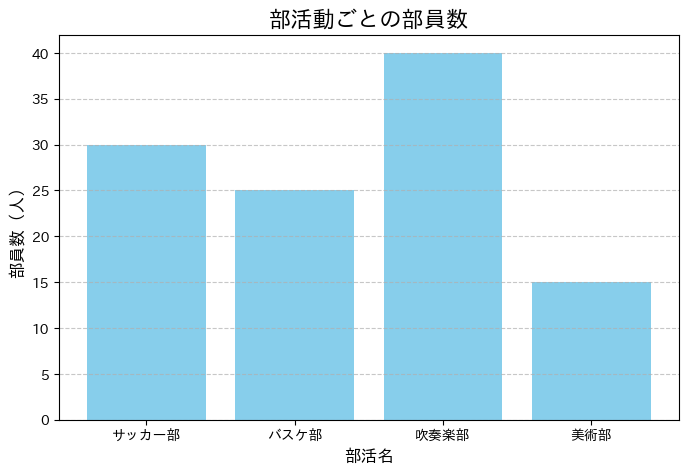

In [37]:
# グラフ作成のライブラリ matplotlib.pyplot を plt というニックネームでimportします
import matplotlib.pyplot as plt

# グラフのサイズを指定します
plt.figure(figsize=(8, 5))

# 棒グラフを作成します (x軸に「部活名」、y軸に「部員数」を指定)
plt.bar(df_club['部活名'], df_club['部員数'], color='skyblue')

# グラフのタイトルやラベルを追加して分かりやすくします
plt.title('部活動ごとの部員数', fontsize=16)
plt.xlabel('部活名', fontsize=12)
plt.ylabel('部員数（人）', fontsize=12)
# y軸に点線の補助線（グリッド）を入れて見やすくします
plt.grid(axis='y', linestyle='--', alpha=0.7)

# グラフを表示します
plt.show()

# このように、数行のコードで簡単に棒グラフを作成し、タイトルやラベルを追加することができます。どの部活の部員数が一番多いか、一目瞭然ですね。

### 折れ線グラフを作ってみよう
折れ線グラフは、時間とともにデータがどのように変化したか（推移）を見るのに適しています。
ここでは、ある生徒の1ヶ月の勉強時間の推移を例に、折れ線グラフを作成してみましょう。

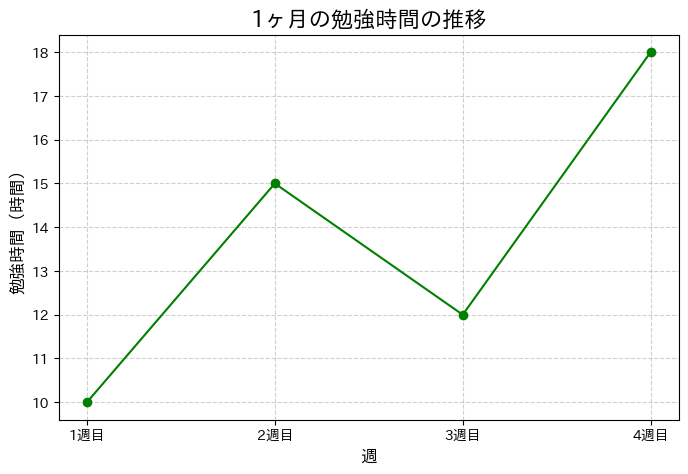

In [38]:
# 折れ線グラフ用のデータを作成します
weeks = ['1週目', '2週目', '3週目', '4週目']
study_hours = [10, 15, 12, 18]

# グラフのサイズを指定します
plt.figure(figsize=(8, 5))

# 折れ線グラフを作成します (x軸に週、y軸に勉強時間)
# marker='o' でデータ点を丸で示します
plt.plot(weeks, study_hours, marker='o', linestyle='-', color='green')

# グラフのタイトルやラベルを追加します
plt.title('1ヶ月の勉強時間の推移', fontsize=16)
plt.xlabel('週', fontsize=12)
plt.ylabel('勉強時間（時間）', fontsize=12)
# グリッド線を追加して見やすくします
plt.grid(True, linestyle='--', alpha=0.6)

# グラフを表示します
plt.show()

# 折れ線グラフを使うことで、勉強時間が週ごとにどのように変化したかがよく分かります。テスト前に勉強時間が増えている様子などが読み取れますね。

### 散布図を作ってみよう
散布図は、2つの数値データ間の関係性（相関）を見るのに適しています。
例えば、「勉強時間が長いほど、テストの点数は高くなるのか？」といった関係を見たいときに使います。

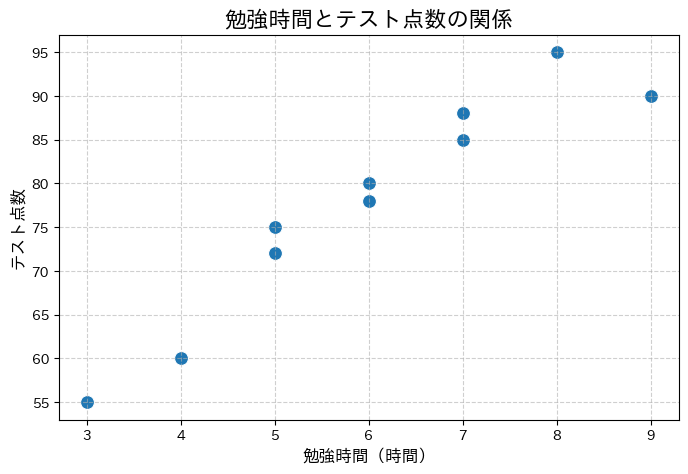

In [39]:
# より綺麗なグラフを簡単に作るためのライブラリ seaborn を sns というニックネームでimportします
import seaborn as sns

# 散布図用のデータを作成します（10人分の勉強時間とテストの点数）
scatter_data = {
    '勉強時間（時間）': [5, 7, 4, 6, 8, 3, 7, 6, 9, 5],
    'テスト点数':     [75, 88, 60, 80, 95, 55, 85, 78, 90, 72]
}
df_scatter = pd.DataFrame(scatter_data)

# グラフのサイズを指定します
plt.figure(figsize=(8, 5))

# Seabornを使って散布図を作成します
sns.scatterplot(data=df_scatter, x='勉強時間（時間）', y='テスト点数', s=100)

# グラフのタイトルやラベルを追加します
plt.title('勉強時間とテスト点数の関係', fontsize=16)
plt.xlabel('勉強時間（時間）', fontsize=12)
plt.ylabel('テスト点数', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# グラフを表示します
plt.show()

# この散布図を見ると、点が全体的に右上がりに分布しているのが分かります。これは、勉強時間が長いほど、テストの点数も高くなる傾向がある（＝正の相関がある）ことを示唆しています。

## 実践的なデータ分析例 (20分)
### データを組み合わせて、疑問を解決しよう！
これまでに学んだPandasでのデータ操作と、グラフ作成を組み合わせて、身近な疑問をデータで解決する流れを体験してみましょう。

### 分析テーマ
今回は、「高校のあるクラスのテスト結果」という架空のデータを使います。このデータから、以下のような疑問について考えてみます。

**【疑問1】** クラス（A組, B組）によって、テストの平均点に違いはあるか？
**【疑問2】** 勉強時間が長い生徒ほど、テストの点数は高い傾向にあるか？

それでは、このデータをPandas DataFrameとして扱い、分析と可視化を行ってみましょう。

#### データの準備
まず、分析に使う架空の生徒データを作成し、DataFrameとして読み込みます。

In [40]:
# 分析に使う架空の生徒データを作成します
student_data = {
    '生徒ID': list(range(1, 21)),
    'クラス': ['A組'] * 10 + ['B組'] * 10,
    '学習時間（週）': [5, 7, 4, 6, 8, 5, 7, 6, 9, 5, 6, 5, 7, 8, 6, 5, 7, 8, 6, 7],
    'テスト点数': [75, 88, 60, 80, 95, 70, 85, 78, 90, 72, 80, 75, 88, 92, 78, 70, 85, 90, 77, 82]
}

# DataFrameを作成します
df_students = pd.DataFrame(student_data)

# データの最初の5行を表示して確認します
display(df_students.head())

,生徒ID,クラス,学習時間（週）,テスト点数
0,1,A組,5,75
1,2,A組,7,88
2,3,A組,4,60
3,4,A組,6,80
4,5,A組,8,95


--- (分析1) ---
#### 【疑問1】クラスごとの平均テスト点数を比較する
Pandasの `groupby()` を使ってクラスごとにデータをまとめ、平均点を計算します。

In [41]:
# 'クラス'でグループ化し、'テスト点数'の平均を計算します
average_score_by_class = df_students.groupby('クラス')['テスト点数'].mean().reset_index()

# 計算結果を表示します
display(average_score_by_class)

,クラス,テスト点数
0,A組,79.3
1,B組,81.7


この集計結果を棒グラフで可視化して、違いを分かりやすく見てみましょう。

C:\Users\user\AppData\Local\Temp\ipykernel_15188\1385948687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_score_by_class, x='クラス', y='テスト点数', palette='viridis')


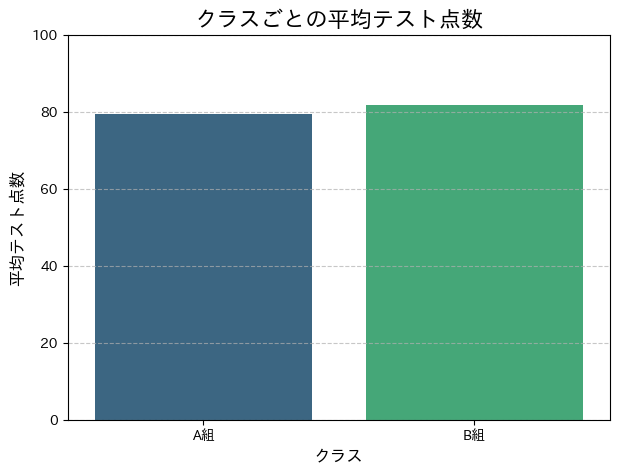

In [42]:
# 棒グラフを作成します
plt.figure(figsize=(7, 5))
sns.barplot(data=average_score_by_class, x='クラス', y='テスト点数', palette='viridis')
plt.title('クラスごとの平均テスト点数', fontsize=16)
plt.xlabel('クラス', fontsize=12)
plt.ylabel('平均テスト点数', fontsize=12)
plt.ylim(0, 100) # y軸の範囲を0点から100点に設定します
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **【疑問1の結論】**
# 集計結果とグラフから、**B組の平均点（81.7点）の方が、A組（79.3点）よりもやや高い**ことが分かりました。

--- (分析2) ---
#### 【疑問2】学習時間とテスト点数の関係を調べる
次に、学習時間とテスト点数の関係を散布図で見てみましょう。クラスごとに色分けして、クラスによる違いも確認します。

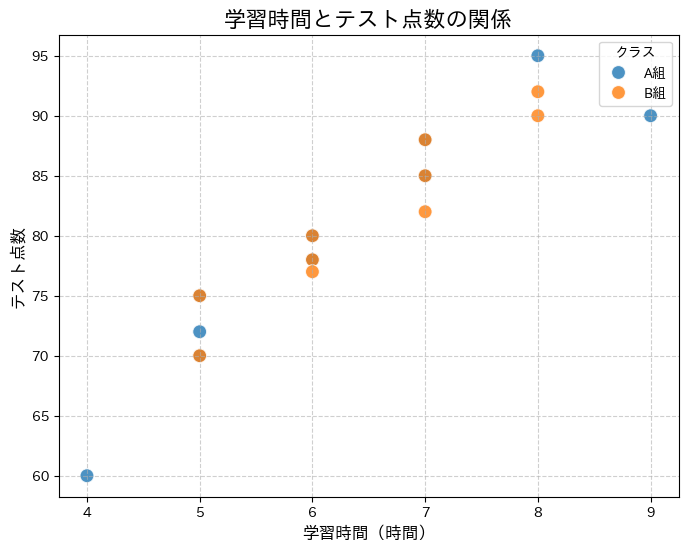

In [43]:
# 散布図を作成します。hue='クラス'でクラスごとに色分けします
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_students, x='学習時間（週）', y='テスト点数', hue='クラス', s=100, alpha=0.8)
plt.title('学習時間とテスト点数の関係', fontsize=16)
plt.xlabel('学習時間（時間）', fontsize=12)
plt.ylabel('テスト点数', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='クラス') # 凡例を表示します
plt.show()

# **【疑問2の結論】**
# 散布図を見ると、点が全体的に右上がりに分布しています。このことから、**学習時間が長い生徒ほど、テスト点数が高い傾向にある**という関係が見て取れます。
# クラスによる大きな違いは、この図からはあまり見られないようです。

## まとめと質疑応答 (10分)
### この授業で学んだことと、次の一歩

#### この授業で学んだことの振り返り
1.  **Pandas**: DataFrameを使って、表形式のデータをプログラムで扱う基本を学びました。（データの作成、表示、列の選択、条件での絞り込み、グループごとの集計など）
2.  **データの可視化**: MatplotlibやSeabornを使って、データの特徴を分かりやすく伝えるためのグラフ（棒グラフ、折れ線グラフ、散布図）の作り方を学びました。
3.  **データ分析の流れ**: 「疑問を立てる → データを準備する → 集計・加工する → グラフで可視化する → 結論を考える」という、データ分析の基本的な流れを体験しました。

これらのスキルは、探究活動のレポート作成や、社会問題の分析など、様々な場面で応用できます。

#### 次の一歩 - さらに学ぶには？
データ分析の世界はとても奥が深いです。もし興味を持ったら、ぜひ次のステップに進んでみてください。

1.  **色々なグラフに挑戦**: 今日紹介した以外にも、データの分布を見る「ヒストグラム」や、複数の項目の比較に便利な「箱ひげ図」など、たくさんのグラフがあります。Seabornの公式サイトにはグラフの例がたくさん載っているので、ぜひ見てみてください。
2.  **本物のデータを分析してみる**: 政府の統計サイト「e-Stat」や、データ分析コンペティションサイト「Kaggle (カグル)」などには、無料で使える本物のデータがたくさんあります。自分の興味があるテーマ（例：スポーツ、音楽、ゲームなど）のデータを見つけて、今日学んだスキルで分析してみると、もっと楽しく学べます。
3.  **統計学の基礎を学ぶ**: 「平均」「相関」といった言葉が出てきましたが、こうした統計学の知識を少し学ぶと、データ分析の結果をより深く、正しく解釈できるようになります。

---
### 質疑応答
本日の内容で、分からなかったことや、もっと知りたいことはありますか？

---
## 演習問題

これまでに学んだ Pandas と Matplotlib/Seaborn の使い方を復習するために、架空のテスト結果データ `df_exam` を使っていくつかの演習問題に挑戦してみましょう。

データセット `df_exam` は、20人の生徒のクラス、国語、数学、理科、社会、英語の点数を含んでいます。

問題を解くことで、データの確認、特定のデータの抽出、集計、そして可視化のスキルを定着させましょう。

In [44]:
# 演習問題に使用する架空のデータセットを作成

# データの定義（生徒の名前、クラス、科目別点数）
exam_data = {
    '生徒名': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
             'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'],
    'クラス': ['1組'] * 10 + ['2組'] * 10,
    '国語': [70, 85, 65, 78, 92, 55, 70, 80, 88, 75,
           60, 75, 88, 95, 70, 65, 80, 90, 72, 78],
    '数学': [80, 75, 70, 85, 90, 60, 75, 88, 82, 70,
           70, 80, 92, 85, 75, 68, 85, 95, 78, 82],
    '理科': [65, 70, 75, 80, 88, 50, 65, 78, 85, 70,
           60, 70, 85, 90, 75, 60, 75, 88, 68, 72],
    '社会': [75, 80, 70, 85, 90, 65, 70, 82, 88, 78,
           68, 75, 88, 92, 70, 62, 80, 90, 75, 80],
    '英語': [85, 90, 78, 88, 95, 70, 85, 92, 90, 80,
           75, 85, 90, 98, 80, 70, 88, 95, 82, 88]
}

# 辞書を基にDataFrameを作成
df_exam = pd.DataFrame(exam_data)

# 作成したDataFrameの最初の数行を表示
print("演習用のデータセット（df_exam）")
display(df_exam.head())

演習用のデータセット（df_exam）


,生徒名,クラス,国語,数学,理科,社会,英語
0,A,1組,70,80,65,75,85
1,B,1組,85,75,70,80,90
2,C,1組,65,70,75,70,78
3,D,1組,78,85,80,85,88
4,E,1組,92,90,88,90,95


### 問題 1: データの確認

まずは、データセット `df_exam` の中身を確認してみましょう。

**目標:** DataFrameの最初の5行を表示して、データが正しく読み込まれているか、どのようなカラム（列）があるかを確認する。

In [45]:
# 問題 1 の解答コードを記述してください
display(df_exam.head())

,生徒名,クラス,国語,数学,理科,社会,英語
0,A,1組,70,80,65,75,85
1,B,1組,85,75,70,80,90
2,C,1組,65,70,75,70,78
3,D,1組,78,85,80,85,88
4,E,1組,92,90,88,90,95


### 問題 2: 特定の列の選択

「数学」の点数だけが知りたいとします。

**目標:** データセット `df_exam` から、「数学」の列だけを選択して表示する。

In [46]:
# 問題 2 の解答コードを記述してください
display(df_exam['数学'])

0     80
1     75
2     70
3     85
4     90
5     60
6     75
7     88
8     82
9     70
10    70
11    80
12    92
13    85
14    75
15    68
16    85
17    95
18    78
19    82
Name: 数学, dtype: int64

### 問題 3: 条件に合うデータの抽出

「英語」の点数が90点以上の生徒のデータだけを抽出したいとします。

**目標:** データセット `df_exam` から、「英語」の点数が90点以上の生徒のすべての列を表示する。

In [47]:
# 問題 3 の解答コードを記述してください
display(df_exam[df_exam['英語'] >= 90])

,生徒名,クラス,国語,数学,理科,社会,英語
1,B,1組,85,75,70,80,90
4,E,1組,92,90,88,90,95
7,H,1組,80,88,78,82,92
8,I,1組,88,82,85,88,90
12,M,2組,88,92,85,88,90
13,N,2組,95,85,90,92,98
17,R,2組,90,95,88,90,95


### 問題 4: クラスごとの平均点の計算

クラス（1組、2組）ごとに「国語」の平均点がどう違うかを知りたいとします。

**目標:** データセット `df_exam` を使って、クラスごとの「国語」の平均点を計算して表示する。

In [48]:
# 問題 4 の解答コードを記述してください
average_kokugo_by_class = df_exam.groupby('クラス')['国語'].mean()
display(average_kokugo_by_class)

クラス
1組    75.8
2組    77.3
Name: 国語, dtype: float64

### 問題 5: 関係性の可視化（散布図）

「数学」と「理科」の点数にはどのような関係があるでしょうか？

**目標:** `df_exam` データフレームを使い、「数学」を x 軸、「理科」を y 軸とする散布図を作成して、2つの科目の点数の関係性を視覚的に確認する。

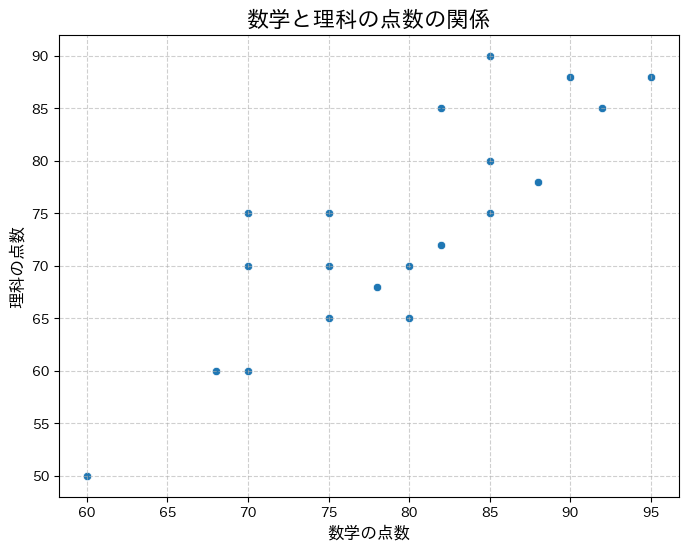

In [49]:
# 問題 5 の解答コードを記述してください
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exam, x='数学', y='理科')
plt.title('数学と理科の点数の関係', fontsize=16)
plt.xlabel('数学の点数', fontsize=12)
plt.ylabel('理科の点数', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 問題 6: 比較の可視化（棒グラフ）

クラスごとの「英語」の平均点の違いを、グラフで分かりやすく比較してみましょう。

**目標:** まず、クラスごとの英語の平均点を計算し、その結果を使って棒グラフを作成する。

C:\Users\user\AppData\Local\Temp\ipykernel_15188\4164259385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_english_by_class, x='クラス', y='英語', palette='viridis')


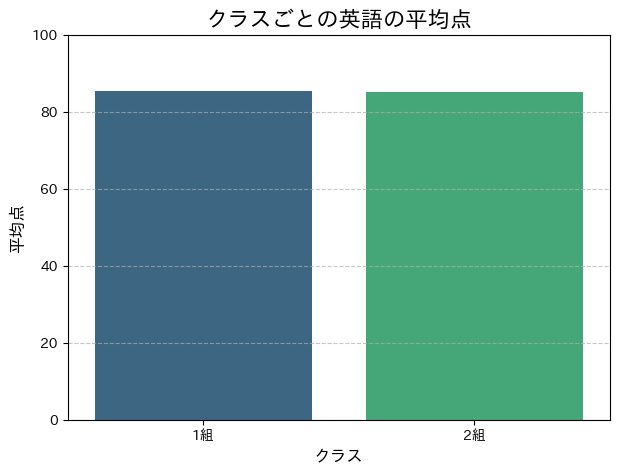

In [50]:
# 問題 6 の解答コードを記述してください
# 1. クラスごとの英語の平均点を計算
average_english_by_class = df_exam.groupby('クラス')['英語'].mean().reset_index()

# 2. 棒グラフを作成
plt.figure(figsize=(7, 5))
sns.barplot(data=average_english_by_class, x='クラス', y='英語', palette='viridis')
plt.title('クラスごとの英語の平均点', fontsize=16)
plt.xlabel('クラス', fontsize=12)
plt.ylabel('平均点', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 演習問題のまとめ

#### 分析結果のポイント
* **データの確認**: `head()` を使うことで、データセットの構造（行と列）を素早く把握できました。
* **データの抽出**: 特定の列（数学）や、条件（英語が90点以上）に合う行を簡単に見つけ出すことができました。
* **集計**: `groupby()` を使うことで、クラスごとの平均点など、データを要約した新しい情報を作ることができました。
* **可視化**: 散布図からは「数学の点数が高い生徒は理科の点数も高い傾向にある」という関係性が見え、棒グラフからは「2組の方が1組よりも英語の平均点がわずかに高い」という違いがひと目で分かりました。

#### 考察と次のステップ
今回の演習では、基本的なデータ操作と可視化を行いました。ここからさらに、「なぜ2組の方が英語の平均点が高いのか？」や「5教科の合計点が最も高い生徒は誰か？」といった新しい疑問を見つけ、分析を深めていくことができます。

ぜひ、今日学んだことを使って、身の回りのデータで色々な分析に挑戦してみてください！